In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform=transforms.Compose([transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))])


dataset1 = datasets.MNIST('./data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.MNIST('./data', train=False,
                   transform=transform)

In [6]:
x,y = dataset1[0]
x.size(), y

(torch.Size([1, 28, 28]), 5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(7, 2, 1, 0, 4, 1, 4, 9, 5, 9)


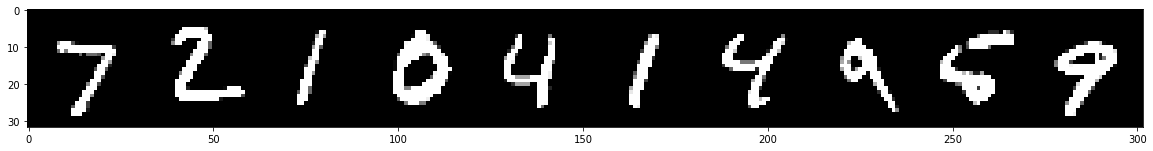

In [9]:
import matplotlib.pyplot as plt
import torchvision

x,y = zip(*[dataset2[i] for i in range(10)])
x = torch.stack(x)

grid_img = torchvision.utils.make_grid(x, nrow=10)
plt.figure(figsize=(20,5))
plt.imshow(grid_img.permute(1, 2, 0))
print(y)

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [12]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()), end='\r')



def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)), end='\r')


train_loader = torch.utils.data.DataLoader(dataset1, batch_size=64,)
test_loader = torch.utils.data.DataLoader(dataset2,  batch_size=64)

model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

for epoch in range(1,10 + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

Train Epoch: 1 [59520/60000 (99%)]	Loss: 0.020453
Test set: Average loss: 0.0498, Accuracy: 9831/10000 (98%)
Train Epoch: 2 [59520/60000 (99%)]	Loss: 0.005677
Test set: Average loss: 0.0370, Accuracy: 9878/10000 (99%)
Train Epoch: 3 [59520/60000 (99%)]	Loss: 0.000600
Test set: Average loss: 0.0330, Accuracy: 9891/10000 (99%)
Train Epoch: 4 [59520/60000 (99%)]	Loss: 0.003325
Test set: Average loss: 0.0332, Accuracy: 9888/10000 (99%)
Train Epoch: 5 [59520/60000 (99%)]	Loss: 0.000550
Test set: Average loss: 0.0360, Accuracy: 9896/10000 (99%)
Train Epoch: 6 [59520/60000 (99%)]	Loss: 0.008444
Test set: Average loss: 0.0250, Accuracy: 9916/10000 (99%)
Train Epoch: 7 [59520/60000 (99%)]	Loss: 0.000639
Test set: Average loss: 0.0245, Accuracy: 9923/10000 (99%)
Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.001204
Test set: Average loss: 0.0243, Accuracy: 9927/10000 (99%)
Train Epoch: 9 [59520/60000 (99%)]	Loss: 0.001037
Test set: Average loss: 0.0252, Accuracy: 9930/10000 (99%)
Train Epoch: 10 [59

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(7, 2, 1, 0, 4, 1, 4, 9, 5, 9)


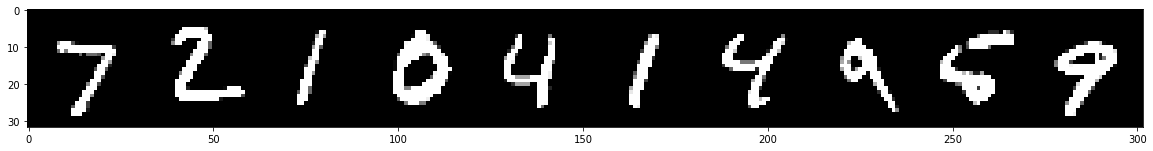

In [13]:
import matplotlib.pyplot as plt

x,y = zip(*[dataset2[i] for i in range(10)])
x = torch.stack(x)
#y = torch.stack(y)
grid_img = torchvision.utils.make_grid(x, nrow=10)

plt.figure(figsize=(20,5))
plt.imshow(grid_img.permute(1, 2, 0))
print(y)

In [14]:
pred = model(x.cuda())
pred.max(1).indices

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], device='cuda:0')